## Introduction

Smite data is hosted in the Smite Guru website and my match history (last 6 mos only available) as of today is in 7 pages (https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=1 through 7). There is a home page that shows Win/Loss ratio, total minutes played, gods played etc. throughout history, but for now we will focus on last 6 mos data available at a more granular level. 

Notes for later: I want to collect each item's attributes and store them in a separate pandas dataframe so that we can tie it back with the main dataset. Similarly, a dataframe that stores each god's major characteristics will be useful as well.

## Gathering data

On each of those pages, there are multiple matches and there is a 'View Match' button you can click to see all details about the match. So the first step is collecting all the links for the different 'View Matches'.



In [51]:
### Sample code for one page ###

url = "https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=1"

#Import requests library and download the HTML
import requests
result = requests.get(url)

#Using BeautifulSoup to parse the HTML and get a BeautifulSoup object
from bs4 import BeautifulSoup
soup = BeautifulSoup(result.text, 'html.parser')

#Find the 'View Match' URLs we need within this page and store it in a list
import re
matches = soup.find_all("a", href=re.compile("/match/"))
match_list = list(matches)

#Slice the above URLs to extract the match ID and prefix with the Smite Guru URL. Store this in another list
match_valid_urls = []

for match in match_list:
    str_match = (str(match))
    #print('https://smite.guru'+str_match[21:38]) #slice just the match IDs and prefix with the standard URL
    str_match_sliced = 'https://smite.guru'+str_match[21:38]
    match_valid_urls.append(str_match_sliced) #store in another list
    
print(len(match_valid_urls))
match_valid_urls

25


['https://smite.guru/match/1012053641',
 'https://smite.guru/match/1011872331',
 'https://smite.guru/match/1011606584',
 'https://smite.guru/match/1011306421',
 'https://smite.guru/match/1011243700',
 'https://smite.guru/match/1011047191',
 'https://smite.guru/match/1010926477',
 'https://smite.guru/match/1010839948',
 'https://smite.guru/match/1010120495',
 'https://smite.guru/match/1010057807',
 'https://smite.guru/match/1009984166',
 'https://smite.guru/match/1009822637',
 'https://smite.guru/match/1009567565',
 'https://smite.guru/match/1009285960',
 'https://smite.guru/match/1009165508',
 'https://smite.guru/match/1009020434',
 'https://smite.guru/match/1008188360',
 'https://smite.guru/match/1008124568',
 'https://smite.guru/match/1007623772',
 'https://smite.guru/match/1007514242',
 'https://smite.guru/match/1007427425',
 'https://smite.guru/match/1007214925',
 'https://smite.guru/match/1006910904',
 'https://smite.guru/match/1006779338',
 'https://smite.guru/match/1006735903']

Now that we have the code for one page, I am going to parse through all the 7 pages and store all the match URLs. One enhancement here would be to identify how many pages can be traversed automatically rather than hardcode as below.

Once we have the indiviual match URLs, we can collect the granular data from each match.

In [1]:
#Import libraries
import requests
import re
from bs4 import BeautifulSoup

In [2]:
#Define a function to retrieve and store URLs
#Taken from https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

In [6]:
#Store the 7 page links in a list
pages = []
for i in range(1,7):
    pages.append('https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page={}'.format(i))
pages

['https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=1',
 'https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=2',
 'https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=3',
 'https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=4',
 'https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=5',
 'https://smite.guru/profile/701823578-ShobiZ%20Bans/matches?page=6']

In [7]:
#Loop through each page and find all the VIEW MATCH links
matches_unclean = []
for page in pages:
    url = getAndParseURL(page)
    matches_unclean.append(url.find_all("a", href=re.compile("/match/")))

In [8]:
print(len(matches_unclean)) #so it is a list within a list
for i in range(6):
    print(len(matches_unclean[i]))

6
25
25
25
25
25
25


In [9]:
#Extract the matches into one single list
all_matches_unclean = [item for sublist in matches_unclean for item in sublist]
print(len(all_matches_unclean)) #adds up

150


In [10]:
all_matches_unclean

[<a class="sub" href="/match/1031399852">View Match</a>,
 <a class="sub" href="/match/1030758525">View Match</a>,
 <a class="sub" href="/match/1030374912">View Match</a>,
 <a class="sub" href="/match/1024965077">View Match</a>,
 <a class="sub" href="/match/1024706330">View Match</a>,
 <a class="sub" href="/match/1023715052">View Match</a>,
 <a class="sub" href="/match/1023343231">View Match</a>,
 <a class="sub" href="/match/1022361539">View Match</a>,
 <a class="sub" href="/match/1022194924">View Match</a>,
 <a class="sub" href="/match/1022058638">View Match</a>,
 <a class="sub" href="/match/1021798803">View Match</a>,
 <a class="sub" href="/match/1016513890">View Match</a>,
 <a class="sub" href="/match/1016260638">View Match</a>,
 <a class="sub" href="/match/1015994153">View Match</a>,
 <a class="sub" href="/match/1015911344">View Match</a>,
 <a class="sub" href="/match/1015804370">View Match</a>,
 <a class="sub" href="/match/1015671307">View Match</a>,
 <a class="sub" href="/match/10

In [11]:
#Now slice the URLs and prefix the Smite Guru link. Store this in another list
final_matches = []
for match in all_matches_unclean:
    str_match = str(match)
    str_match_sliced = 'https://smite.guru'+str_match[21:38]
    final_matches.append(str_match_sliced)
    
final_matches

['https://smite.guru/match/1031399852',
 'https://smite.guru/match/1030758525',
 'https://smite.guru/match/1030374912',
 'https://smite.guru/match/1024965077',
 'https://smite.guru/match/1024706330',
 'https://smite.guru/match/1023715052',
 'https://smite.guru/match/1023343231',
 'https://smite.guru/match/1022361539',
 'https://smite.guru/match/1022194924',
 'https://smite.guru/match/1022058638',
 'https://smite.guru/match/1021798803',
 'https://smite.guru/match/1016513890',
 'https://smite.guru/match/1016260638',
 'https://smite.guru/match/1015994153',
 'https://smite.guru/match/1015911344',
 'https://smite.guru/match/1015804370',
 'https://smite.guru/match/1015671307',
 'https://smite.guru/match/1015617455',
 'https://smite.guru/match/1015482236',
 'https://smite.guru/match/1015210103',
 'https://smite.guru/match/1015053198',
 'https://smite.guru/match/1014902680',
 'https://smite.guru/match/1014690821',
 'https://smite.guru/match/1014461155',
 'https://smite.guru/match/1014342322',


In [12]:
#So some matches have a different length and hence "" is included in the name. Removing them manually here for now
new_final = [match.replace('"','') for match in final_matches]
new_final #all good

['https://smite.guru/match/1031399852',
 'https://smite.guru/match/1030758525',
 'https://smite.guru/match/1030374912',
 'https://smite.guru/match/1024965077',
 'https://smite.guru/match/1024706330',
 'https://smite.guru/match/1023715052',
 'https://smite.guru/match/1023343231',
 'https://smite.guru/match/1022361539',
 'https://smite.guru/match/1022194924',
 'https://smite.guru/match/1022058638',
 'https://smite.guru/match/1021798803',
 'https://smite.guru/match/1016513890',
 'https://smite.guru/match/1016260638',
 'https://smite.guru/match/1015994153',
 'https://smite.guru/match/1015911344',
 'https://smite.guru/match/1015804370',
 'https://smite.guru/match/1015671307',
 'https://smite.guru/match/1015617455',
 'https://smite.guru/match/1015482236',
 'https://smite.guru/match/1015210103',
 'https://smite.guru/match/1015053198',
 'https://smite.guru/match/1014902680',
 'https://smite.guru/match/1014690821',
 'https://smite.guru/match/1014461155',
 'https://smite.guru/match/1014342322',


In [13]:
len(new_final)

150

In [247]:
###### Part 'Try for one match first' ######

#Import requests library and download the HTML
url = 'https://smite.guru/match/1011872331'

import requests
result = requests.get(url)

#Using BeautifulSoup to parse the HTML and get a BeautifulSoup object
from bs4 import BeautifulSoup
soup = BeautifulSoup(result.text, 'html.parser')
print(soup.prettify())

<html data-n-head="" data-n-head-ssr="">
 <head>
  <title data-n-head="true">
   Normal: Joust - Match 1011872331 - SmiteGuru
  </title>
  <meta charset="utf-8" data-n-head="true"/>
  <meta content="width=device-width, initial-scale=1" data-n-head="true" name="viewport"/>
  <meta content="SmiteGuru" data-n-head="true" name="og:site_name"/>
  <meta content="website" data-n-head="true" name="og:type"/>
  <meta content="summary" data-n-head="true" name="twitter:card"/>
  <meta content="@Smite_Guru" data-n-head="true" name="twitter:site"/>
  <meta content="Smite, PS4 Smite, Xbox Smite, SmiteGuru, SmiteGuru Score, Smite Elo, Smite Ranking, Smite MMR, Smite Profiles, Smite Builds" data-n-head="true" name="keywords"/>
  <meta content="Rf30uGgDMlt8la3n_6az1m9FxAdKWfPRzLh7oPGKQJU" data-n-head="true" name="google-site-verification"/>
  <meta content="SmiteGuru" data-n-head="true" name="apple-mobile-web-app-title"/>
  <meta content="SmiteGuru" data-n-head="true" name="application-name"/>
  <meta 

In [152]:
#Time of match field

mydivs = soup.findAll("div", {"class": "page-header__div"})[0]
time = mydivs.get_text()[-10:] #the first part if just the match type which is always the same for me. 
time

'19 minutes'

In [153]:
#Match ID

matchIdText = soup.title.get_text()
matchId = [int(i) for i in matchIdText.split() if i.isdigit()][0]
matchId

1011872331

In [154]:
#Date

date = soup.findAll("div", {"class": "page-header__div"})[1].findAll("h3", {"class": "tooltip c-help"})[0]['data-tooltip']
date

'Wednesday, March 4, 2020 3:46 AM'

In [244]:
#1 player full row except items
username = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].find("a").get_text()
level = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[0].get_text()
kda = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[1].get_text()
gold = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[2].get_text()
gpm = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[3].get_text()
damage = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[4].get_text()
taken = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[5].get_text()
mitigated = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[6].get_text()
god = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].find("img")['alt']

print(username)
print(god)
print(level)
print(kda)
print(gold)
print(gpm)
print(damage)
print(taken)
print(mitigated)


Lordhecklebee
Hades
15
13 / 6 / 9
15,280
804
15,717
21,319
21,628


In [242]:
#player items
p1_items_list = []
p1_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("h1")
for i in range(len(list(p1_items_bs4))):
    p1_items_list.append(p1_items_bs4[i].get_text())

print(p1_items_list)


['Cloak of Concentration', "Bancroft's Talon", 'Shoes of Focus', 'Breastplate of Valor', 'Void Stone', 'Spear of the Magus']


In [245]:
#position
tablePos = 1 
rowPos = 0

###### End of part 'Try for one match first' ######

In [12]:
len(new_final)


156

In [14]:
### Full code to extract from all matches into a dictionary and then a list ###

#Ran on 05042020 - 150 matches#

#Download libraries and get the html text
import requests
import pandas as pd
from bs4 import BeautifulSoup

cnt = 0
match_details = []

for url in new_final:
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')

    #duration
    duration = soup.findAll("div", {"class": "page-header__div"})[0].get_text()

    #day
    date = soup.findAll("div", {"class": "page-header__div"})[1].findAll("h3", {"class": "tooltip c-help"})[0]['data-tooltip']

    #matchID
    matchIdText = soup.title.get_text()
    matchId = [int(i) for i in matchIdText.split() if i.isdigit()][0]

    #win or not
    i = 0
    for i in range(6):
        a = str(soup.findAll("div", {"class": "match-table__body"})[3].findAll("a")[i].get_text())
        if a == 'ShobiZ Bans':
            break

    winLoss = str(soup.findAll("div", {"class": "match-table__body"})[3].findAll("div", {"class" : "row match-table__row"})[i].find("div", {"class" : "row__item"}).get_text())

    #player 1 non-items
    p1_god = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].find("img")['alt']
    p1_username = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].find("a").get_text()
    p1_level = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[0].get_text()
    p1_kda = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[1].get_text()
    p1_gold = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[2].get_text()
    p1_gpm = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[3].get_text()
    p1_damage = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[4].get_text()
    p1_taken = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[5].get_text()
    p1_mitigated = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[6].get_text()
    p1_row = 0

    #player 1 items
    p1_items_list = []
    p1_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[0].findAll("h1")
    for i in range(len(list(p1_items_bs4))):
        p1_items_list.append(p1_items_bs4[i].get_text())

    #player 2 non-items
    p2_god = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].find("img")['alt']
    p2_username = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].find("a").get_text()
    p2_level = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[0].get_text()
    p2_kda = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[1].get_text()
    p2_gold = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[2].get_text()
    p2_gpm = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[3].get_text()
    p2_damage = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[4].get_text()
    p2_taken = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[5].get_text()
    p2_mitigated = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[6].get_text()
    p2_row = 0

    #player 2 items
    p2_items_list = []
    p2_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[1].findAll("h1")
    for i in range(len(list(p2_items_bs4))):
        p2_items_list.append(p2_items_bs4[i].get_text())

    #player 3 non-items
    p3_god = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].find("img")['alt']
    p3_username = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].find("a").get_text()
    p3_level = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[0].get_text()
    p3_kda = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[1].get_text()
    p3_gold = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[2].get_text()
    p3_gpm = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[3].get_text()
    p3_damage = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[4].get_text()
    p3_taken = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[5].get_text()
    p3_mitigated = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[6].get_text()
    p3_row = 0

    #player 3 items
    p3_items_list = []
    p3_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[0].findAll("div", {"class": "row match-table__row"})[2].findAll("h1")
    for i in range(len(list(p3_items_bs4))):
        p3_items_list.append(p3_items_bs4[i].get_text())

    #player 4 non-items
    p4_god = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].find("img")['alt']
    p4_username = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].find("a").get_text()
    p4_level = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[0].get_text()
    p4_kda = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[1].get_text()
    p4_gold = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[2].get_text()
    p4_gpm = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[3].get_text()
    p4_damage = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[4].get_text()
    p4_taken = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[5].get_text()
    p4_mitigated = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("div", {"class": "row__item"})[6].get_text()
    p4_row = 1

    #player 4 items
    p4_items_list = []
    p4_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[0].findAll("h1")
    for i in range(len(list(p4_items_bs4))):
        p4_items_list.append(p4_items_bs4[i].get_text())

    #player 5 non-items
    p5_god = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].find("img")['alt']
    p5_username = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].find("a").get_text()
    p5_level = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[0].get_text()
    p5_kda = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[1].get_text()
    p5_gold = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[2].get_text()
    p5_gpm = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[3].get_text()
    p5_damage = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[4].get_text()
    p5_taken = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[5].get_text()
    p5_mitigated = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("div", {"class": "row__item"})[6].get_text()
    p5_row = 1

    #player 5 items
    p5_items_list = []
    p5_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[1].findAll("h1")
    for i in range(len(list(p5_items_bs4))):
        p5_items_list.append(p5_items_bs4[i].get_text())

    #player 6 non-items
    p6_god = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].find("img")['alt']
    p6_username = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].find("a").get_text()
    p6_level = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[0].get_text()
    p6_kda = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[1].get_text()
    p6_gold = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[2].get_text()
    p6_gpm = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[3].get_text()
    p6_damage = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[4].get_text()
    p6_taken = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[5].get_text()
    p6_mitigated = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("div", {"class": "row__item"})[6].get_text()
    p6_row = 1

    #player 6 items
    p6_items_list = []
    p6_items_bs4 = soup.findAll("div", {"class": "match-table__body"})[1].findAll("div", {"class": "row match-table__row"})[2].findAll("h1")
    for i in range(len(list(p6_items_bs4))):
        p6_items_list.append(p6_items_bs4[i].get_text())

    #Create a list of dictionaries and convert to dataframe
    match_details.append({'MatchId': matchId,
                         'Duration': duration,
                         'MatchDate': date,
                         'WinLoss' : winLoss,
                         'P1_God': p1_god,
                         'P1_UserName' : p1_username,
                         'P1_Level' : p1_level,
                         'P1_KDA' : p1_kda,
                         'P1_Gold' : p1_gold,
                         'P1_GPM' : p1_gpm,
                         'P1_Damage' : p1_damage,
                         'P1_Taken' : p1_taken,
                         'P1_Mitigated' : p1_mitigated,
                         'P1_Items' : p1_items_list,
                         'P1_Row' : p1_row,
                         'P2_God': p2_god,
                         'P2_UserName' : p2_username,
                         'P2_Level' : p2_level,
                         'P2_KDA' : p2_kda,
                         'P2_Gold' : p2_gold,
                         'P2_GPM' : p2_gpm,
                         'P2_Damage' : p2_damage,
                         'P2_Taken' : p2_taken,
                         'P2_Mitigated' : p2_mitigated,
                         'P2_Items' : p2_items_list,
                         'P2_Row' : p2_row,
                         'P3_God': p3_god,
                         'P3_UserName' : p3_username,
                         'P3_Level' : p3_level,
                         'P3_KDA' : p3_kda,
                         'P3_Gold' : p3_gold,
                         'P3_GPM' : p3_gpm,
                         'P3_Damage' : p3_damage,
                         'P3_Taken' : p3_taken,
                         'P3_Mitigated' : p3_mitigated,
                         'P3_Items' : p3_items_list,
                         'P3_Row' : p3_row,
                         'P4_God': p4_god,
                         'P4_UserName' : p4_username,
                         'P4_Level' : p4_level,
                         'P4_KDA' : p4_kda,
                         'P4_Gold' : p4_gold,
                         'P4_GPM' : p4_gpm,
                         'P4_Damage' : p4_damage,
                         'P4_Taken' : p4_taken,
                         'P4_Mitigated' : p4_mitigated,
                         'P4_Items' : p4_items_list,
                         'P4_Row' : p4_row,
                         'P5_God': p5_god,
                         'P5_UserName' : p5_username,
                         'P5_Level' : p5_level,
                         'P5_KDA' : p5_kda,
                         'P5_Gold' : p5_gold,
                         'P5_GPM' : p5_gpm,
                         'P5_Damage' : p5_damage,
                         'P5_Taken' : p5_taken,
                         'P5_Mitigated' : p5_mitigated,
                         'P5_Items' : p5_items_list,
                         'P5_Row' : p5_row,
                         'P6_God': p6_god,
                         'P6_UserName' : p6_username,
                         'P6_Level' : p6_level,
                         'P6_KDA' : p6_kda,
                         'P6_Gold' : p6_gold,
                         'P6_GPM' : p6_gpm,
                         'P6_Damage' : p6_damage,
                         'P6_Taken' : p6_taken,
                         'P6_Mitigated' : p6_mitigated,
                         'P6_Items' : p6_items_list,
                         'P6_Row' : p6_row})
    
    print(cnt)
    print(url)
    print('done')
    cnt += 1



0
https://smite.guru/match/1031399852
done
1
https://smite.guru/match/1030758525
done
2
https://smite.guru/match/1030374912
done
3
https://smite.guru/match/1024965077
done
4
https://smite.guru/match/1024706330
done
5
https://smite.guru/match/1023715052
done
6
https://smite.guru/match/1023343231
done
7
https://smite.guru/match/1022361539
done
8
https://smite.guru/match/1022194924
done
9
https://smite.guru/match/1022058638
done
10
https://smite.guru/match/1021798803
done
11
https://smite.guru/match/1016513890
done
12
https://smite.guru/match/1016260638
done
13
https://smite.guru/match/1015994153
done
14
https://smite.guru/match/1015911344
done
15
https://smite.guru/match/1015804370
done
16
https://smite.guru/match/1015671307
done
17
https://smite.guru/match/1015617455
done
18
https://smite.guru/match/1015482236
done
19
https://smite.guru/match/1015210103
done
20
https://smite.guru/match/1015053198
done
21
https://smite.guru/match/1014902680
done
22
https://smite.guru/match/1014690821
don

In [15]:
data = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P1_God' , 
                                             'P1_UserName',
                                             'P1_Level',
                                             'P1_KDA',
                                             'P1_Gold',
                                             'P1_GPM',
                                             'P1_Damage',
                                             'P1_Taken',
                                             'P1_Mitigated',
                                             'P1_Items',
                                             'P1_Row',
                                             'P2_God',
                                             'P2_UserName',
                                             'P2_Level',
                                             'P2_KDA' ,
                                             'P2_Gold',
                                             'P2_GPM',
                                             'P2_Damage',
                                             'P2_Taken',
                                             'P2_Mitigated',
                                             'P2_Items',
                                             'P2_Row',
                                             'P3_God',
                                             'P3_UserName',
                                             'P3_Level',
                                             'P3_KDA',
                                             'P3_Gold',
                                             'P3_GPM',
                                             'P3_Damage',
                                             'P3_Taken',
                                             'P3_Mitigated',
                                             'P3_Items' ,
                                             'P3_Row',
                                             'P4_God',
                                             'P4_UserName',
                                             'P4_Level',
                                             'P4_KDA',
                                             'P4_Gold',
                                             'P4_GPM' ,
                                             'P4_Damage',
                                             'P4_Taken',
                                             'P4_Mitigated',
                                             'P4_Items',
                                             'P4_Row',
                                             'P5_God',
                                             'P5_UserName',
                                             'P5_Level',
                                             'P5_KDA',
                                             'P5_Gold',
                                             'P5_GPM' ,
                                             'P5_Damage',
                                             'P5_Taken',
                                             'P5_Mitigated',
                                             'P5_Items',
                                             'P5_Row',
                                             'P6_God',
                                             'P6_UserName',
                                             'P6_Level',
                                             'P6_KDA',
                                             'P6_Gold',
                                             'P6_GPM',
                                             'P6_Damage',
                                             'P6_Taken',
                                             'P6_Mitigated',
                                             'P6_Items',
                                             'P6_Row'])

## Assesssing and Cleaning Data

In [16]:
data.head(2)

,MatchId,Duration,MatchDate,WinLoss,P1_God,P1_UserName,P1_Level,P1_KDA,P1_Gold,P1_GPM,...,P6_UserName,P6_Level,P6_KDA,P6_Gold,P6_GPM,P6_Damage,P6_Taken,P6_Mitigated,P6_Items,P6_Row
0,1031399852,Normal: Joust Match 1031399852 - 14 minutes,"Saturday, April 25, 2020 11:42 PM",L,Scylla,,15,8 / 1 / 1,"10,839",774,...,zombiepro0115,11,0 / 7 / 3,"8,153",582,"7,689","18,145","16,789","[Evolved Warrior's Blessing, Gladiator's Shiel...",1
1,1030758525,Normal: Joust Match 1030758525 - 5 minutes,"Friday, April 24, 2020 2:04 PM",L,Jormungandr,Lady Cutlip,6,0 / 1 / 1,"4,413",883,...,bluefirez9,6,1 / 1 / 0,"4,299",860,356,"3,418","1,402","[Guardian's Blessing, Shoes of Focus]",1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 70 columns):
MatchId         150 non-null int64
Duration        150 non-null object
MatchDate       150 non-null object
WinLoss         150 non-null object
P1_God          150 non-null object
P1_UserName     150 non-null object
P1_Level        150 non-null object
P1_KDA          150 non-null object
P1_Gold         150 non-null object
P1_GPM          150 non-null object
P1_Damage       150 non-null object
P1_Taken        150 non-null object
P1_Mitigated    150 non-null object
P1_Items        150 non-null object
P1_Row          150 non-null int64
P2_God          150 non-null object
P2_UserName     150 non-null object
P2_Level        150 non-null object
P2_KDA          150 non-null object
P2_Gold         150 non-null object
P2_GPM          150 non-null object
P2_Damage       150 non-null object
P2_Taken        150 non-null object
P2_Mitigated    150 non-null object
P2_Items        150 non-null obje

This format does not work well. so I am going to stack rows on top of each other.

In [18]:
data_p1 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P1_God' , 
                                             'P1_UserName',
                                             'P1_Level',
                                             'P1_KDA',
                                             'P1_Gold',
                                             'P1_GPM',
                                             'P1_Damage',
                                             'P1_Taken',
                                             'P1_Mitigated',
                                             'P1_Items',
                                             'P1_Row'])
data_p2 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P2_God',
                                             'P2_UserName',
                                             'P2_Level',
                                             'P2_KDA' ,
                                             'P2_Gold',
                                             'P2_GPM',
                                             'P2_Damage',
                                             'P2_Taken',
                                             'P2_Mitigated',
                                             'P2_Items',
                                             'P2_Row'])
data_p3 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P3_God',
                                             'P3_UserName',
                                             'P3_Level',
                                             'P3_KDA',
                                             'P3_Gold',
                                             'P3_GPM',
                                             'P3_Damage',
                                             'P3_Taken',
                                             'P3_Mitigated',
                                             'P3_Items' ,
                                             'P3_Row'])
data_p4 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P4_God',
                                             'P4_UserName',
                                             'P4_Level',
                                             'P4_KDA',
                                             'P4_Gold',
                                             'P4_GPM' ,
                                             'P4_Damage',
                                             'P4_Taken',
                                             'P4_Mitigated',
                                             'P4_Items',
                                             'P4_Row'])
data_p5 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P5_God',
                                             'P5_UserName',
                                             'P5_Level',
                                             'P5_KDA',
                                             'P5_Gold',
                                             'P5_GPM' ,
                                             'P5_Damage',
                                             'P5_Taken',
                                             'P5_Mitigated',
                                             'P5_Items',
                                             'P5_Row'])
data_p6 = pd.DataFrame(match_details, columns = ['MatchId',
                                             'Duration',
                                             'MatchDate',
                                             'WinLoss',
                                             'P6_God',
                                             'P6_UserName',
                                             'P6_Level',
                                             'P6_KDA',
                                             'P6_Gold',
                                             'P6_GPM',
                                             'P6_Damage',
                                             'P6_Taken',
                                             'P6_Mitigated',
                                             'P6_Items',
                                             'P6_Row'])

Now we need to just append on top of each other and rename the columns

In [19]:
import numpy as np
df = pd.DataFrame(np.concatenate((data_p1.values, data_p2.values, data_p3.values, data_p4.values, data_p5.values, data_p6.values), axis=0))
df.columns = ['MatchId',
             'Duration',
             'MatchDate',
             'WinLoss',
             'God' , 
             'UserName',
             'Level',
             'KDA',
             'Gold',
             'GPM',
             'Damage',
             'Taken',
             'Mitigated',
             'Items',
             'Row']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
MatchId      900 non-null object
Duration     900 non-null object
MatchDate    900 non-null object
WinLoss      900 non-null object
God          900 non-null object
UserName     900 non-null object
Level        900 non-null object
KDA          900 non-null object
Gold         900 non-null object
GPM          900 non-null object
Damage       900 non-null object
Taken        900 non-null object
Mitigated    900 non-null object
Items        900 non-null object
Row          900 non-null object
dtypes: object(15)
memory usage: 105.6+ KB


This looks good for now. Saving to a CSV.

In [21]:
df.to_csv('smite_data.csv')

## Part 1 - My Matches

Subset records where user name is Shobiz Bans

In [45]:
df_mine = df[df['UserName'] == "ShobiZ Bans"].reset_index().copy()

In [46]:
df_mine.info() #need to drop the Index column
df_mine.drop('index', axis=1, inplace=True)
df_mine.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 16 columns):
index        149 non-null int64
MatchId      149 non-null object
Duration     149 non-null object
MatchDate    149 non-null object
WinLoss      149 non-null object
God          149 non-null object
UserName     149 non-null object
Level        149 non-null object
KDA          149 non-null object
Gold         149 non-null object
GPM          149 non-null object
Damage       149 non-null object
Taken        149 non-null object
Mitigated    149 non-null object
Items        149 non-null object
Row          149 non-null object
dtypes: int64(1), object(15)
memory usage: 18.8+ KB


,MatchId,Duration,MatchDate,WinLoss,God,UserName,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,Row
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,ShobiZ Bans,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",0
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,ShobiZ Bans,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",0
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,ShobiZ Bans,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",0
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,ShobiZ Bans,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",0
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,ShobiZ Bans,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",0


Dropping columns we do not need - Row and UserName.

In [47]:
df_mine.drop(['Row','UserName'], axis=1, inplace=True)

In [48]:
df_mine.head(3)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ..."
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At..."
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o..."


First, I want to look at overall win rate.

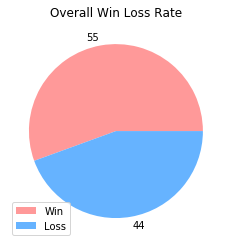

In [449]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

wl = df_mine['WinLoss'].value_counts(normalize=True)*100
wl = wl.astype(int)
colors = ['#ff9999','#66b3ff']
plt.pie(wl, labels = wl, colors = colors)
plt.title('Overall Win Loss Rate')
plt.legend(labels,loc = 3)
plt.show()
#55% is actually pretty good and the average is always around 50%

Seeing how I played different gods and how win rate varies by them

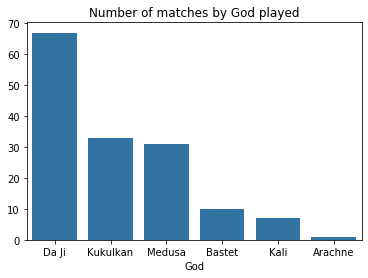

In [448]:
c = sb.color_palette()[0]
sb.countplot(df_mine['God'], color = c, order = df_mine['God'].value_counts().index);
plt.title('Number of matches by God played');
plt.xlabel('God');
plt.ylabel('');
#I mostly play using assassins! 

Creating a column to differentiate Assasin, Mage, and Hunter

In [111]:
#Medusa = Hunter, Kukulkan = Mage, Others = Assassin

def classify_god (row):
    if row['God'] == 'Medusa':
        return 'Hunter'
    elif row['God'] == 'Kukulkan':
        return 'Mage'
    else:
        return 'Assassin'

df_mine['TypeOfGod'] = df_mine.apply (lambda row: classify_god(row), axis=1)

In [134]:
df_mine.head()

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage


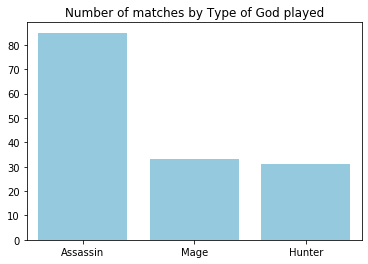

In [133]:
#Validating it
df_mine['TypeOfGod'].value_counts() #looks right based on chart above
c = sb.color_palette()[0]
sb.countplot(df_mine['TypeOfGod'], color = 'skyblue', order = df_mine['TypeOfGod'].value_counts().index);
plt.title('Number of matches by Type of God played');
plt.xlabel('');
plt.ylabel('');

Win Rate by type of God - Am I better with certain types of Gods?

In [123]:
den = df_mine.groupby('TypeOfGod')['MatchId'].count().reset_index()
num = df_mine.query('WinLoss == "W"').groupby('TypeOfGod')['MatchId'].count().reset_index()
full = pd.merge(num, den, on = 'TypeOfGod', suffixes = ('_WinCnt','_TotCnt'))
full['WinRate'] = np.ceil((full['MatchId_WinCnt']/full['MatchId_TotCnt'])*100)
full

,TypeOfGod,MatchId_WinCnt,MatchId_TotCnt,WinRate
0,Assassin,48,85,57.0
1,Hunter,17,31,55.0
2,Mage,18,33,55.0


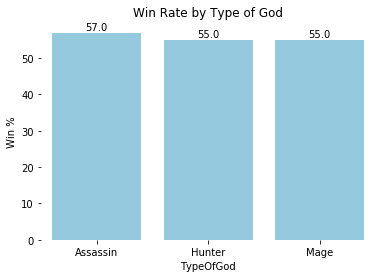

In [132]:
sb.barplot(data = full, x='TypeOfGod', y='WinRate', color = 'skyblue');
plt.ylabel('Win %')
plt.title('Win Rate by Type of God')

for i, v in enumerate(full['WinRate']):
    plt.text(i-0.1, v + 0.7, str(v))

sb.despine(bottom = True, left = True)
plt.show()
#Not much of a difference but slightly better with Assassins

Time related fields

In [136]:
df_mine.head(2)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter


In [145]:
#Splitting the MatchDate column

df_mine[['Day','Date','YearAndTime']] = df_mine.MatchDate.str.split(pat=',',expand=True) 

In [148]:
df_mine.head(1) 
#1. Modify Date to date format with year appended
#2. Extract just time in a column

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Day,Date,YearAndTime
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,March 18,2020 2:44 PM


In [172]:
df_mine['Time'] = df_mine.YearAndTime.str[6:].str.strip()
df_mine['Year'] = df_mine.YearAndTime.str[:5].str.strip()
df_mine.head(10)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Day,Date,YearAndTime,Time,Year
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,March 18,2020 2:44 PM,2:44 PM,2020
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,March 15,2020 5:00 PM,5:00 PM,2020
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,March 12,2020 12:32 AM,12:32 AM,2020
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,March 1,2020 8:44 PM,8:44 PM,2020
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,February 7,2020 5:14 PM,5:14 PM,2020
5,995111172,Normal: Joust Match 995111172 - 26 minutes,"Saturday, January 4, 2020 10:18 PM",W,Kukulkan,18,9 / 4 / 2,"18,417",708,"38,165","16,375","6,093","[Shoes of Focus, Evolved Book of Thoth, Chrono...",Mage,Saturday,January 4,2020 10:18 PM,10:18 PM,2020
6,995032943,Normal: Joust Match 995032943 - 11 minutes,"Saturday, January 4, 2020 5:20 PM",L,Da Ji,9,3 / 3 / 4,"8,005",728,"5,230","6,385","2,086","[Ninja Tabi, Transcendence, Heavy Mace]",Assassin,Saturday,January 4,2020 5:20 PM,5:20 PM,2020
7,993634489,Normal: Joust Match 993634489 - 33 minutes,"Monday, December 30, 2019 4:50 PM",W,Da Ji,20,6 / 3 / 12,"21,643",656,"23,886","22,825","12,802","[Ninja Tabi, Transcendence, Wind Demon, Hasten...",Assassin,Monday,December 30,2019 4:50 PM,4:50 PM,2019
8,989341541,Normal: Joust Match 989341541 - 13 minutes,"Saturday, December 14, 2019 10:00 PM",L,Da Ji,11,3 / 7 / 3,"8,938",688,"7,751","11,018","3,904","[Ninja Tabi, Transcendence, Jotunn's Wrath, Hy...",Assassin,Saturday,December 14,2019 10:00 PM,10:00 PM,2019
9,1024965077,Normal: Joust Match 1024965077 - 10 minutes,"Friday, April 10, 2020 3:48 PM",W,Medusa,10,3 / 0 / 2,"7,443",744,"2,784","5,608","2,127","[Ninja Tabi, Transcendence, Mace]",Hunter,Friday,April 10,2020 3:48 PM,3:48 PM,2020


In [175]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_mine['Time'].value_counts()
df_mine['Year'].value_counts()
#looks good.

2020    115
2019     34
Name: Year, dtype: int64

When did I usually play?

In [193]:
df_mine['Day'].value_counts() #need to convert to Categorical type

from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df_mine['DayOrdered'] = df_mine['Day'].astype(cat_type)
df_mine.head(2) #dropped a few columns after this

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Day,Date,YearAndTime,Time,Year,DayofWeek,test,DayOrdered
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,March 18,2020 2:44 PM,2:44 PM,2020,Wednesday,Wednesday,Wednesday
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,March 15,2020 5:00 PM,5:00 PM,2020,Sunday,Sunday,Sunday


In [219]:
df_mine.head(2)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Date,Time,Year,DayOrdered
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,March 18,2:44 PM,2020,Wednesday
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,March 15,5:00 PM,2020,Sunday


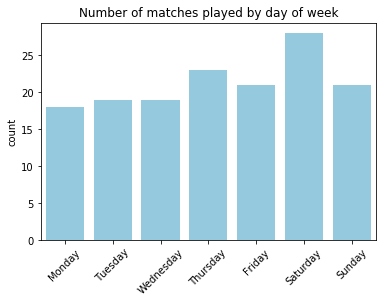

In [218]:
#Plotting the graph

sb.countplot(x="DayOrdered", data=df_mine,color='skyblue');
plt.xticks(rotation=45);
plt.xlabel('');
plt.title('Number of matches played by day of week'); #clearly happiest on Saturday

What are the min/max dates?

In [226]:
df_mine['DateFull'] = df_mine['Date'] + ' ' + df_mine['Year']
df_mine.head(5)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Date,Time,Year,DayOrdered,DateFull
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,March 18,2:44 PM,2020,Wednesday,March 18 2020
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,March 15,5:00 PM,2020,Sunday,March 15 2020
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,March 12,12:32 AM,2020,Thursday,March 12 2020
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,March 1,8:44 PM,2020,Sunday,March 1 2020
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,February 7,5:14 PM,2020,Friday,February 7 2020


In [227]:
df_mine.drop(['Date','Year'],axis=1,inplace=True)
#convert to date format

In [239]:
df_mine['DateTyped'] = pd.to_datetime(df_mine['DateFull'])

In [240]:
df_mine.drop(['DateFull'],axis=1,inplace=True)

In [249]:
#Min Max Dates
print(min(df_mine['DateTyped']))
print(max(df_mine['DateTyped']))

#From Novemeber 24 2019 to April 25th 2020 = 

2019-11-24 00:00:00
2020-04-25 00:00:00


Creating a 1/0 version of W/L column for that and plotting it.

In [254]:
df_mine.head(2)
df_mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 17 columns):
MatchId       149 non-null object
Duration      149 non-null object
MatchDate     149 non-null object
WinLoss       149 non-null object
God           149 non-null object
Level         149 non-null object
KDA           149 non-null object
Gold          149 non-null object
GPM           149 non-null object
Damage        149 non-null object
Taken         149 non-null object
Mitigated     149 non-null object
Items         149 non-null object
TypeOfGod     149 non-null object
Time          149 non-null object
DayOrdered    149 non-null category
DateTyped     149 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(15)
memory usage: 19.3+ KB


In [267]:
df_mine['TimeTyped1'] = pd.to_datetime(df_mine['Time'], format='%I:%M %p')
df_mine.head(30)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Time,DayOrdered,DateTyped,TimeTyped1
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,2:44 PM,Wednesday,2020-03-18,1900-01-01 14:44:00
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,5:00 PM,Sunday,2020-03-15,1900-01-01 17:00:00
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,12:32 AM,Thursday,2020-03-12,1900-01-01 00:32:00
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,8:44 PM,Sunday,2020-03-01,1900-01-01 20:44:00
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,5:14 PM,Friday,2020-02-07,1900-01-01 17:14:00
5,995111172,Normal: Joust Match 995111172 - 26 minutes,"Saturday, January 4, 2020 10:18 PM",W,Kukulkan,18,9 / 4 / 2,"18,417",708,"38,165","16,375","6,093","[Shoes of Focus, Evolved Book of Thoth, Chrono...",Mage,10:18 PM,Saturday,2020-01-04,1900-01-01 22:18:00
6,995032943,Normal: Joust Match 995032943 - 11 minutes,"Saturday, January 4, 2020 5:20 PM",L,Da Ji,9,3 / 3 / 4,"8,005",728,"5,230","6,385","2,086","[Ninja Tabi, Transcendence, Heavy Mace]",Assassin,5:20 PM,Saturday,2020-01-04,1900-01-01 17:20:00
7,993634489,Normal: Joust Match 993634489 - 33 minutes,"Monday, December 30, 2019 4:50 PM",W,Da Ji,20,6 / 3 / 12,"21,643",656,"23,886","22,825","12,802","[Ninja Tabi, Transcendence, Wind Demon, Hasten...",Assassin,4:50 PM,Monday,2019-12-30,1900-01-01 16:50:00
8,989341541,Normal: Joust Match 989341541 - 13 minutes,"Saturday, December 14, 2019 10:00 PM",L,Da Ji,11,3 / 7 / 3,"8,938",688,"7,751","11,018","3,904","[Ninja Tabi, Transcendence, Jotunn's Wrath, Hy...",Assassin,10:00 PM,Saturday,2019-12-14,1900-01-01 22:00:00
9,1024965077,Normal: Joust Match 1024965077 - 10 minutes,"Friday, April 10, 2020 3:48 PM",W,Medusa,10,3 / 0 / 2,"7,443",744,"2,784","5,608","2,127","[Ninja Tabi, Transcendence, Mace]",Hunter,3:48 PM,Friday,2020-04-10,1900-01-01 15:48:00


In [276]:
df_mine['TimeTyped2'] = df_mine.TimeTyped1.astype(str).str[11:].str.strip()
df_mine['TimeFormatted'] = df_mine.DateTyped.astype(str) + ' ' + df_mine.TimeTyped2
df_mine['DateTime'] = pd.to_datetime(df_mine['TimeFormatted'])
df_mine.head(5)

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,Time,DayOrdered,DateTyped,TimeTyped1,TimeTyped2,TimeFormatted,DateTime
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,2:44 PM,Wednesday,2020-03-18,1900-01-01 14:44:00,14:44:00,2020-03-18 14:44:00,2020-03-18 14:44:00
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,5:00 PM,Sunday,2020-03-15,1900-01-01 17:00:00,17:00:00,2020-03-15 17:00:00,2020-03-15 17:00:00
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,12:32 AM,Thursday,2020-03-12,1900-01-01 00:32:00,00:32:00,2020-03-12 00:32:00,2020-03-12 00:32:00
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,8:44 PM,Sunday,2020-03-01,1900-01-01 20:44:00,20:44:00,2020-03-01 20:44:00,2020-03-01 20:44:00
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,5:14 PM,Friday,2020-02-07,1900-01-01 17:14:00,17:14:00,2020-02-07 17:14:00,2020-02-07 17:14:00


In [277]:
#Dropping other date columns
df_mine.drop(['DateTyped','TimeTyped1','TimeTyped2','TimeFormatted','Time'],axis=1,inplace=True)

In [279]:
df_mine.head(10)
df_mine.info() #looks good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 16 columns):
MatchId       149 non-null object
Duration      149 non-null object
MatchDate     149 non-null object
WinLoss       149 non-null object
God           149 non-null object
Level         149 non-null object
KDA           149 non-null object
Gold          149 non-null object
GPM           149 non-null object
Damage        149 non-null object
Taken         149 non-null object
Mitigated     149 non-null object
Items         149 non-null object
TypeOfGod     149 non-null object
DayOrdered    149 non-null category
DateTime      149 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(14)
memory usage: 18.1+ KB


In [284]:
#Creating a 1/0 flag for Win/Loss
def win_binary (row):
    if row['WinLoss'] == 'W':
        return 1
    else:
        return 0

df_mine['IsWin'] = df_mine.apply (lambda row: win_binary(row), axis=1)
df_mine.head(5) #looks good

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,2020-03-18 14:44:00,1
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,2020-03-15 17:00:00,1
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,2020-03-12 00:32:00,0
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,2020-03-01 20:44:00,1
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,2020-02-07 17:14:00,0


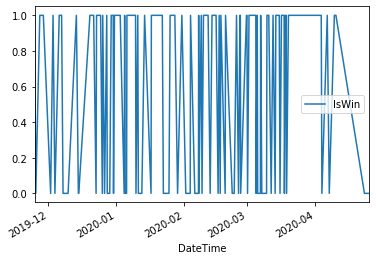

In [297]:
#Plot but this is super messy. Needs to be cleaned up.
df_mine.plot.line(x='DateTime', y='IsWin');

Looking at DURATION of each match and LEVELS.

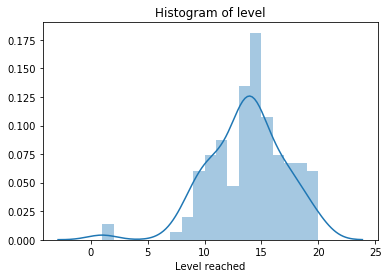

In [302]:
#Levels histogram
levels = df_mine['Level'].astype(int)
sb.distplot(levels, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Level reached');
plt.title('Histogram of level');

In [311]:
#Duration histogram
df_mine['JustDuration'] = df_mine.Duration.str[32:].str.strip()
df_mine['DurationMinutes'] = df_mine.JustDuration.str.replace('minutes', '').str.strip()
df_mine['DurationMinutes'] = df_mine.DurationMinutes.astype(int)
df_mine.drop(['JustDuration'],axis=1,inplace=True)
df_mine.head()

,MatchId,Duration,MatchDate,WinLoss,God,Level,KDA,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes
0,1015804370,Normal: Joust Match 1015804370 - 19 minutes,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,5 / 3 / 11,"13,450",708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,2020-03-18 14:44:00,1,19
1,1014902680,Normal: Joust Match 1014902680 - 21 minutes,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,10 / 0 / 4,"13,793",657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,2020-03-15 17:00:00,1,21
2,1013928728,Normal: Joust Match 1013928728 - 39 minutes,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,2 / 11 / 7,"21,287",546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,2020-03-12 00:32:00,0,39
3,1011243700,Normal: Joust Match 1011243700 - 21 minutes,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,9 / 3 / 7,"14,422",687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,2020-03-01 20:44:00,1,21
4,1004602957,Normal: Joust Match 1004602957 - 24 minutes,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,4 / 4 / 3,"14,352",598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,2020-02-07 17:14:00,0,24


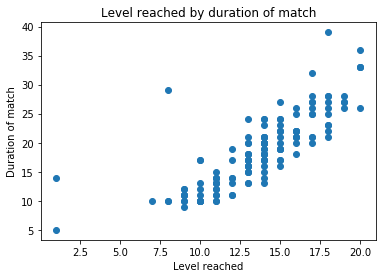

In [316]:
#Scatter plot betwee the two
#df_mine['Level'] = df_mine.Level.astype(int)
plt.scatter(df_mine.Level, df_mine.DurationMinutes);
plt.xlabel('Level reached');
plt.ylabel('Duration of match');
plt.title('Level reached by duration of match');
#Generally higher the level bigger the duration as expected

Curious to see how Level plays with Gold

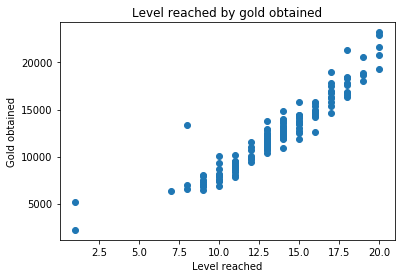

In [318]:
df_mine['Gold'] = df_mine.Gold.str.replace(',','').astype(float)
plt.scatter(df_mine.Level, df_mine.Gold);
plt.xlabel('Level reached');
plt.ylabel('Gold obtained');
plt.title('Level reached by gold obtained');

Relationship between Level and Win/Loss

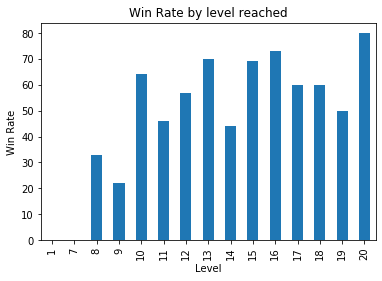

In [395]:
levelByWin = df_mine.groupby('Level').IsWin.agg('mean').round(2)*100
levelByWin.plot.bar()
plt.xlabel('Level');
plt.ylabel('Win Rate');
plt.title('Win Rate by level reached'); #Level 20 is the highest

Extracing Kill Death Assists and calculating a useful metric

In [327]:
df_mine[['K','D','A']] = df_mine.KDA.str.split(pat='/',expand=True).astype(float)
df_mine.head(5)

,MatchId,MatchDate,WinLoss,God,Level,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes,K,D,A
0,1015804370,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,13450.0,708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,2020-03-18 14:44:00,1,19,5,3,11
1,1014902680,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,13793.0,657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,2020-03-15 17:00:00,1,21,10,0,4
2,1013928728,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,21287.0,546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,2020-03-12 00:32:00,0,39,2,11,7
3,1011243700,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,14422.0,687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,2020-03-01 20:44:00,1,21,9,3,7
4,1004602957,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,14352.0,598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,2020-02-07 17:14:00,0,24,4,4,3


In [338]:
#KDA formula : [((Assists / 2) + Kills) / Deaths] but there can be zero deaths, so we add a +1 in such cases
def death_mod (row):
    if row['D'] == 0:
        return 1
    else:
        return row['D']

df_mine['Dmod'] = df_mine.apply (lambda row: death_mod(row), axis=1)
df_mine['KDA'] = round(((df_mine['A']/2) + df_mine['K'])/(df_mine['Dmod']),2) 
df_mine.head(20)

,MatchId,MatchDate,WinLoss,God,Level,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes,K,D,A,KDA,Dmod
0,1015804370,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,13450.0,708,"6,401","13,998","4,700","[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,2020-03-18 14:44:00,1,19,5,3,11,3.50,3
1,1014902680,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,13793.0,657,"14,753","13,084","4,935","[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,2020-03-15 17:00:00,1,21,10,0,4,12.00,1
2,1013928728,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,21287.0,546,"28,658","26,946","9,298","[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,2020-03-12 00:32:00,0,39,2,11,7,0.50,11
3,1011243700,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,14422.0,687,"15,670","18,489","7,858","[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,2020-03-01 20:44:00,1,21,9,3,7,4.17,3
4,1004602957,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,14352.0,598,"24,204","13,563","4,157","[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,2020-02-07 17:14:00,0,24,4,4,3,1.38,4
5,995111172,"Saturday, January 4, 2020 10:18 PM",W,Kukulkan,18,18417.0,708,"38,165","16,375","6,093","[Shoes of Focus, Evolved Book of Thoth, Chrono...",Mage,Saturday,2020-01-04 22:18:00,1,26,9,4,2,2.50,4
6,995032943,"Saturday, January 4, 2020 5:20 PM",L,Da Ji,9,8005.0,728,"5,230","6,385","2,086","[Ninja Tabi, Transcendence, Heavy Mace]",Assassin,Saturday,2020-01-04 17:20:00,0,11,3,3,4,1.67,3
7,993634489,"Monday, December 30, 2019 4:50 PM",W,Da Ji,20,21643.0,656,"23,886","22,825","12,802","[Ninja Tabi, Transcendence, Wind Demon, Hasten...",Assassin,Monday,2019-12-30 16:50:00,1,33,6,3,12,4.00,3
8,989341541,"Saturday, December 14, 2019 10:00 PM",L,Da Ji,11,8938.0,688,"7,751","11,018","3,904","[Ninja Tabi, Transcendence, Jotunn's Wrath, Hy...",Assassin,Saturday,2019-12-14 22:00:00,0,13,3,7,3,0.64,7
9,1024965077,"Friday, April 10, 2020 3:48 PM",W,Medusa,10,7443.0,744,"2,784","5,608","2,127","[Ninja Tabi, Transcendence, Mace]",Hunter,Friday,2020-04-10 15:48:00,1,10,3,0,2,4.00,1


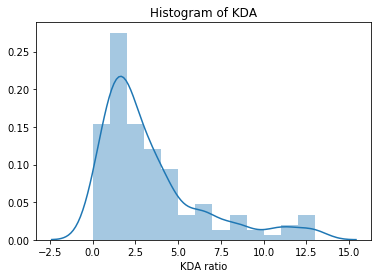

In [339]:
#Plotting the KDA. In general, higher the KDA the better
kda = df_mine['KDA']
sb.distplot(kda)
plt.xlabel('KDA ratio');
plt.title('Histogram of KDA');

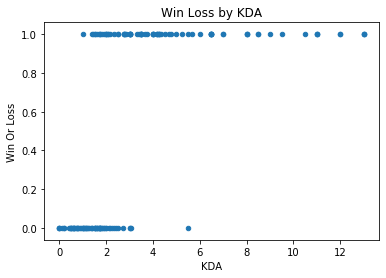

In [356]:
#Scatter plot between KDA and W/L
df_mine.plot(x='KDA', y='IsWin', kind='scatter');
plt.xlabel('KDA');
plt.ylabel('Win Or Loss');
plt.title('Win Loss by KDA');
#Very interesting, so LOSS happens only when KDA is low

In [364]:
#df_mine.info()
df_mine.query('KDA > 4 and IsWin == 0') #only 1 record as per chart above

,MatchId,MatchDate,WinLoss,God,Level,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes,K,D,A,KDA,Dmod
76,1012759989,"Saturday, March 7, 2020 5:30 PM",L,Bastet,18,18346.0,655,"23,751","20,460","7,928","[Ninja Tabi, Jotunn's Wrath, Transcendence, Ha...",Assassin,Saturday,2020-03-07 17:30:00,0,28,8,2,6,5.5,2


Win Rate by day?

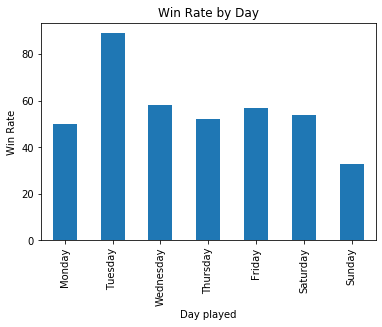

In [398]:
DayByWin = df_mine.groupby('DayOrdered').IsWin.agg('mean').round(2)*100
DayByWin.plot.bar()
plt.xlabel('Day played');
plt.ylabel('Win Rate');
plt.title('Win Rate by Day');
#LOL - what happens on Tuesdays?

Duration vs Win

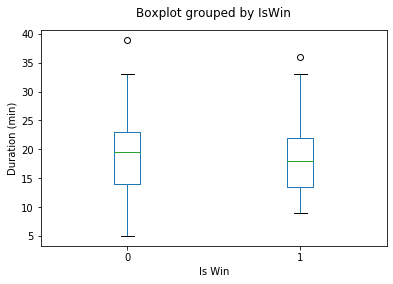

In [443]:
df_mine.boxplot(by ='IsWin', column ='DurationMinutes', grid=False);
plt.title('');
plt.ylabel('Duration (min)');
plt.xlabel('Is Win');
#no clear pattern

Converting few other variables to right data type

In [407]:
df_mine['Gold'] = df_mine.Gold.astype(int)
df_mine['GPM'] = df_mine.GPM.str.replace(',','').astype(int)
df_mine['Damage'] = df_mine.Damage.str.replace(',','').astype(int)
df_mine['Taken'] = df_mine.Taken.str.replace(',','').astype(int)
df_mine['Mitigated'] = df_mine.Mitigated.str.replace(',','').astype(int)

In [410]:
df_mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 21 columns):
MatchId            149 non-null object
MatchDate          149 non-null object
WinLoss            149 non-null object
God                149 non-null object
Level              149 non-null int64
Gold               149 non-null int64
GPM                149 non-null int64
Damage             149 non-null int64
Taken              149 non-null int64
Mitigated          149 non-null int64
Items              149 non-null object
TypeOfGod          149 non-null object
DayOrdered         149 non-null category
DateTime           149 non-null datetime64[ns]
IsWin              149 non-null int64
DurationMinutes    149 non-null int64
K                  149 non-null int64
D                  149 non-null int64
A                  149 non-null int64
KDA                149 non-null float64
Dmod               149 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(12), object(6)
memo

KDA per God?

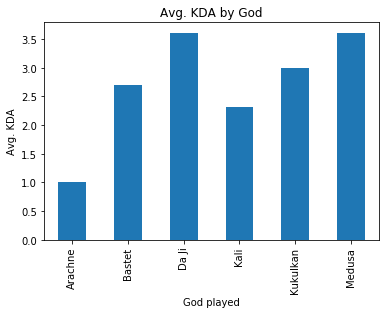

In [421]:
KDAperGod = df_mine.groupby('God').KDA.agg('mean').round(2)
KDAperGod.plot.bar()
plt.xlabel('God played');
plt.ylabel('Avg. KDA');
plt.title('Avg. KDA by God');
#so I am pretty good with Da Ji and Medusa

Scatter plot for numeric variables

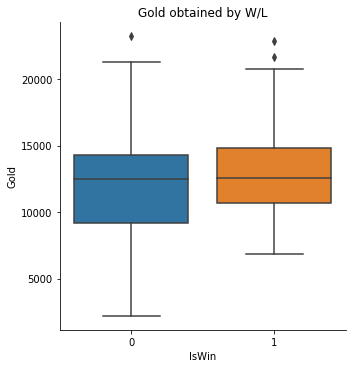

In [431]:
#Plot between Gold and Win/Loss
sb.catplot(x="IsWin", y="Gold", data=df_mine, kind="box");
plt.title('Gold obtained by W/L');

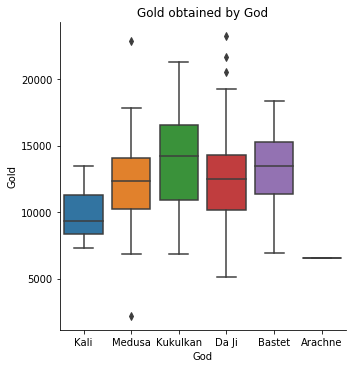

In [433]:
#Plot between Gold and God; Rich Kukulkan
sb.catplot(x="God", y="Gold", data=df_mine, kind="box");
plt.title('Gold obtained by God');

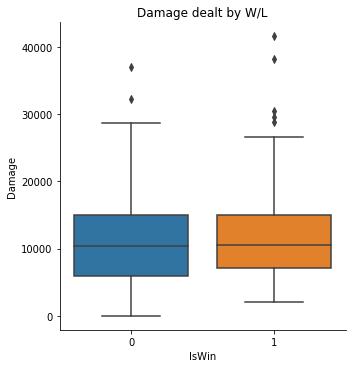

In [436]:
#Plot between Damage and Win/Loss
sb.catplot(x="IsWin", y="Damage", data=df_mine,kind="box");
plt.title('Damage dealt by W/L');

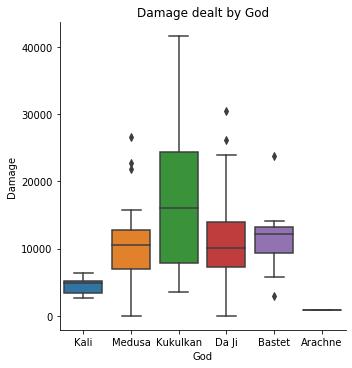

In [437]:
#Plot between Damage and God
sb.catplot(x="God", y="Damage", data=df_mine, kind="box");
plt.title('Damage dealt by God');

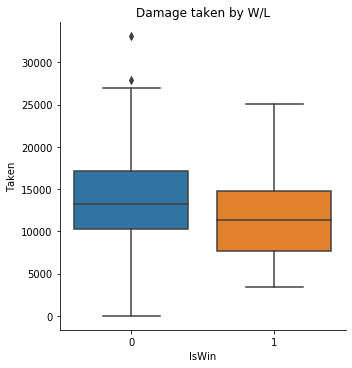

In [438]:
#Plot between Taken and Win/Loss
sb.catplot(x="IsWin", y="Taken", data=df_mine,kind="box");
plt.title('Damage taken by W/L');

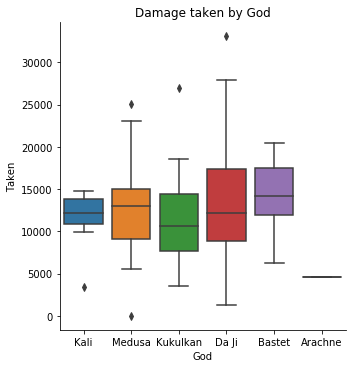

In [439]:
#Plot between Taken and God
sb.catplot(x="God", y="Taken", data=df_mine,kind="box");
plt.title('Damage taken by God');

Seeing if time of day makes a difference

In [445]:
df_mine.head()

,MatchId,MatchDate,WinLoss,God,Level,Gold,GPM,Damage,Taken,Mitigated,Items,TypeOfGod,DayOrdered,DateTime,IsWin,DurationMinutes,K,D,A,KDA,Dmod
0,1015804370,"Wednesday, March 18, 2020 2:44 PM",W,Kali,15,13450,708,6401,13998,4700,"[Ninja Tabi, Hastened Katana, Jotunn's Wrath, ...",Assassin,Wednesday,2020-03-18 14:44:00,1,19,5,3,11,3.50,3
1,1014902680,"Sunday, March 15, 2020 5:00 PM",W,Medusa,15,13793,657,14753,13084,4935,"[Ninja Tabi, Asi, Toxic Blade, The Crusher, At...",Hunter,Sunday,2020-03-15 17:00:00,1,21,10,0,4,12.00,1
2,1013928728,"Thursday, March 12, 2020 12:32 AM",L,Kukulkan,18,21287,546,28658,26946,9298,"[Shoes of Focus, Evolved Book of Thoth, Book o...",Mage,Thursday,2020-03-12 00:32:00,0,39,2,11,7,0.50,11
3,1011243700,"Sunday, March 1, 2020 8:44 PM",W,Da Ji,16,14422,687,15670,18489,7858,"[Ninja Tabi, Transcendence, The Crusher, Haste...",Assassin,Sunday,2020-03-01 20:44:00,1,21,9,3,7,4.17,3
4,1004602957,"Friday, February 7, 2020 5:14 PM",L,Kukulkan,15,14352,598,24204,13563,4157,"[Shoes of Focus, Evolved Book of Thoth, Bancro...",Mage,Friday,2020-02-07 17:14:00,0,24,4,4,3,1.38,4


In [446]:
df_mine.to_csv('smite_data_cleaned.csv')

## Part 2 - Full View - LATER

Need to add a column to identify myself, teammates, and opponents. Then create % based metrics